In [2]:
"""
works after:
 1. pipx runpip eth-ape install notebook matplotlib
 2. ape console
 3. In [1]: from notebook import notebookapp as app
    In [2]: app.launch_new_instance()

NOTE: for some reason `ape-notebook` plugin not displaying in cli when run `ape -h`, so needed to
      pipx runpip install notebook into my ape package env. Then run `ape-notebook` one line src from
      `ape console`.

TODO: figure out why ape-notebook plugin not working for me.
"""
import matplotlib.pyplot as plt
import pandas as pd
import typing as tp
from ape import accounts, chain, Contract, networks

In [3]:
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# get account 0
dev = accounts.test_accounts[0]
dev

<TestAccount 0x1e59ce931B4CFea3fe4B875411e280e173cB7A9C>

In [5]:
# get the balance of account 0
dev.balance

0

In [6]:
current_block = chain.blocks[-1].number
current_block

15449103

In [7]:
dblocks = int(86400*90/12) # last 90 d
start_block = current_block - dblocks
start_block

14801103

In [8]:
curve_steth = Contract("0xDC24316b9AE028F1497c275EB9192a3Ea0f67022")
curve_steth

<Vyper_contract 0xDC24316b9AE028F1497c275EB9192a3Ea0f67022>

In [9]:
steth = Contract("0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84")
steth

<Lido 0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84>

In [10]:
steth.balanceOf(curve_steth)

584713056463357598607562

In [11]:
curve_steth.TokenExchange

TokenExchange(address indexed buyer, int128 sold_id, uint256 tokens_sold, int128 bought_id, uint256 tokens_bought)

In [12]:
type(curve_steth.TokenExchange)

ape.contracts.base.ContractEvent

In [13]:
%time query_swaps_recent = curve_steth.TokenExchange.query("*", start_block=current_block-3000) # last 10 hr
query_swaps_recent

CPU times: user 280 ms, sys: 39.3 ms, total: 320 ms
Wall time: 1.77 s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0x3418bffcbc8cdc0eb5d1e80f00f9d716241dae1c229a...,15446124,0x8fa70cd0a427a55259bad1c437c893b9240870016467...,289,145
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xd0118B21a632615d899b02E8472E9457D...,0xd87f686490d55c81efe729c8e4f9c476b7a77ff6c208...,15446183,0xe0534fa3cd32aba287d7315bd37f9f0fb42a8a6f0ab7...,322,145
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x7b5c2823378666417b6c29f73e8af3c5990c83b8f86c...,15446198,0x552634093a9f8df4e6b26944d5e3062755b69647c4e7...,321,197
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x689E1505A6c873D1cE0b815e358E8c36B...,0x7a6a08e00d1daa904bbcb80faa06410053f6d703cdd9...,15446284,0x79b2319fadf88ce96bd315d77de887b60f711b67433d...,562,272
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x689E1505A6c873D1cE0b815e358E8c36B...,0x7f7d3d77b4219f815599daf5c4ea1a30b241425e396a...,15446332,0xb4608dc902a45da85ac657aa737946168b4663b164d2...,121,26
5,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0xccc294b3ebe68df404b1c5978169fa3d8f598748daff...,15446573,0x21b75a311a030a518da0cde16022a01c0fcaf519be28...,217,92
6,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0xccc294b3ebe68df404b1c5978169fa3d8f598748daff...,15446573,0x21b75a311a030a518da0cde16022a01c0fcaf519be28...,232,92
7,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x834d2767Cc4a8a0b0fA5a4cd0C50d8E08...,0xacf479a28312e7ddcec30ef3629c19563c57282f01de...,15446608,0xdc4c9175bcd67ae79dbfc30caef2964f31f04c43a666...,28,34
8,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xE3c8A4De3b8A484ff890a38d6D7B5D278...,0xb31f28c97f40ef17e2b6aca9306c85caa31a27a089ed...,15446645,0xedaa206f8278f686e44de718171104255790fa2a57c9...,71,21
9,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x0e13274cdb61099649fdd4b1cd8992472aa059e93a30...,15446666,0x2e4f83f7b739692554c8c831f0c96d58c6154a61f5a7...,400,219


In [14]:
# sweet, very cool :)
type(query_swaps_recent)

pandas.core.frame.DataFrame

In [15]:
# take a deeper dive into event arguments column. it's a pandas series
query_swaps_recent["event_arguments"][:10]

0    {'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...
1    {'buyer': '0xd0118B21a632615d899b02E8472E9457D...
2    {'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...
3    {'buyer': '0x689E1505A6c873D1cE0b815e358E8c36B...
4    {'buyer': '0x689E1505A6c873D1cE0b815e358E8c36B...
5    {'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...
6    {'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...
7    {'buyer': '0x834d2767Cc4a8a0b0fA5a4cd0C50d8E08...
8    {'buyer': '0xE3c8A4De3b8A484ff890a38d6D7B5D278...
9    {'buyer': '0xfA9a30350048B2BF66865ee20363067c6...
Name: event_arguments, dtype: object

In [16]:
type(query_swaps_recent["event_arguments"])

pandas.core.series.Series

In [17]:
query_swaps_recent["event_arguments"].iloc[-1]

{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8',
 'sold_id': 1,
 'tokens_sold': 1393232000477341113,
 'bought_id': 0,
 'tokens_bought': 1353186156975432376}

In [18]:
# ok great. let's look a bit farther into the past to start_block from above. see how long it takes
%time query_swaps_original = curve_steth.TokenExchange.query("*", start_block=start_block)
query_swaps_original

CPU times: user 36.4 s, sys: 5.57 s, total: 42 s
Wall time: 3min 29s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xe4f89ef89ea898ff00fab6104e6f1e710d960b841335...,14801106,0x754785094e509a0fb1ebe9939f8679089a5c5cb97a06...,7,0
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xa87d2Fc358bE7B28772b8Eff9D2fd2628...,0xe510d6ae6e7e54135f01f7bb0e9cce3dde3147d9c4b0...,14801191,0x806aa145f02f9a162bb2ac2ecf4f599d16770ce30379...,351,220
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x0acbcf6e2b40974321c88cf51e59c2aecb35ce91264e...,14801276,0xacc314aca967358e6f705d4edcbfc31b002a59cef738...,33,6
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x668fae3bfec1a77b524926e350d793f4320d2c534eac...,14801454,0x77f5e7f963411f63d19071dce4495bbe224ad8456d27...,271,141
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x2A8F327085d733a3DBa191B3647818415...,0x9305a60aa3dbf456f306a9af6a7bab33534734a12042...,14801462,0xa8e6391e329e52c53eeddd64d3655a6627a0991e59f0...,13,3
...,...,...,...,...,...,...,...,...
19509,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xf508346140a1e39dc1a2407ce00c5e32782e2e5e0b17...,15448952,0xbbc2c028f243711931094895914a5702afa7289207cc...,8,2
19510,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xdcDaAC4c3826E7688a2eA2c7d5a3d34CB...,0xb9f43ea5b0e8f9e02445363e90f67aaadce5dfaaadff...,15448962,0x14b75802c403fb0440a52c3ec7c47f496b5de8397baa...,235,143
19511,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x2662D826A86D602c01aFFd6974432E430...,0x182d837872925b1c1bfc3cf817098a3cfa574188a086...,15448970,0x82c75ac4ef1f50219ad880a48c66c40c47affc014601...,123,73
19512,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x605082e0794141C27f59F00f5C25dCde1...,0xb17a079ad541e32042d97bd9653bf226472a6373165a...,15449032,0x86edc078e1c579d5927f3aa3cd5d23474c85d8795949...,166,117


In [19]:
query_swaps = query_swaps_original.copy()

In [20]:
# get coin indices:
#  - 0 = ETH (native)
#  - 1 = stETH
coin_indices = [curve_steth.coins(i) for i in range(2)]
coin_indices

['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',
 '0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84']

In [21]:
steth.address == coin_indices[-1]

True

In [22]:
# cache the fee to calculate associated price correctly (prior to fees applied)
curve_steth_fee = curve_steth.fee() / 1e10  # fee denom is 1e10
curve_steth_fee

0.0004

In [23]:
# if sold_id == 1, then selling stETH for ETH, which is price wanted
#  i.e. quote = <ETH>, base = <stETH>
last_swap = query_swaps["event_arguments"].iloc[-1]
print('last swap event:', last_swap)

last_price = last_swap['tokens_bought'] * (1+curve_steth_fee) / last_swap['tokens_sold']
if last_swap['sold_id'] == 0:
    last_price = 1 / last_price
print('price:', last_price)

last swap event: {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8', 'sold_id': 1, 'tokens_sold': 1393232000477341113, 'bought_id': 0, 'tokens_bought': 1353186156975432376}
price: 0.9716453763439371


In [24]:
# write a function that iterates over event_arguments to calculate marginal price from last token swap
def get_price(event_args: dict) -> float:
    price = event_args['tokens_bought'] * (1+curve_steth_fee) / event_args['tokens_sold']
    if event_args['sold_id'] == 0:
        price = 1 / price
    return price

In [25]:
# validate with logic in cell above for last price
get_price(query_swaps["event_arguments"].iloc[-1]) == last_price

True

In [26]:
# create new column with marginal price (stETH as base and ETH as quote, so should be at a discount)
query_swaps['price (STETH/ETH)'] = query_swaps['event_arguments'].apply(get_price)
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH)
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xe4f89ef89ea898ff00fab6104e6f1e710d960b841335...,14801106,0x754785094e509a0fb1ebe9939f8679089a5c5cb97a06...,7,0,0.983157
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xa87d2Fc358bE7B28772b8Eff9D2fd2628...,0xe510d6ae6e7e54135f01f7bb0e9cce3dde3147d9c4b0...,14801191,0x806aa145f02f9a162bb2ac2ecf4f599d16770ce30379...,351,220,0.983156
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x0acbcf6e2b40974321c88cf51e59c2aecb35ce91264e...,14801276,0xacc314aca967358e6f705d4edcbfc31b002a59cef738...,33,6,0.983155
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x668fae3bfec1a77b524926e350d793f4320d2c534eac...,14801454,0x77f5e7f963411f63d19071dce4495bbe224ad8456d27...,271,141,0.983157
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x2A8F327085d733a3DBa191B3647818415...,0x9305a60aa3dbf456f306a9af6a7bab33534734a12042...,14801462,0xa8e6391e329e52c53eeddd64d3655a6627a0991e59f0...,13,3,0.983156
...,...,...,...,...,...,...,...,...,...
19509,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xf508346140a1e39dc1a2407ce00c5e32782e2e5e0b17...,15448952,0xbbc2c028f243711931094895914a5702afa7289207cc...,8,2,0.971647
19510,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xdcDaAC4c3826E7688a2eA2c7d5a3d34CB...,0xb9f43ea5b0e8f9e02445363e90f67aaadce5dfaaadff...,15448962,0x14b75802c403fb0440a52c3ec7c47f496b5de8397baa...,235,143,0.971646
19511,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x2662D826A86D602c01aFFd6974432E430...,0x182d837872925b1c1bfc3cf817098a3cfa574188a086...,15448970,0x82c75ac4ef1f50219ad880a48c66c40c47affc014601...,123,73,0.971646
19512,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x605082e0794141C27f59F00f5C25dCde1...,0xb17a079ad541e32042d97bd9653bf226472a6373165a...,15449032,0x86edc078e1c579d5927f3aa3cd5d23474c85d8795949...,166,117,0.971646


<AxesSubplot:xlabel='block_number'>

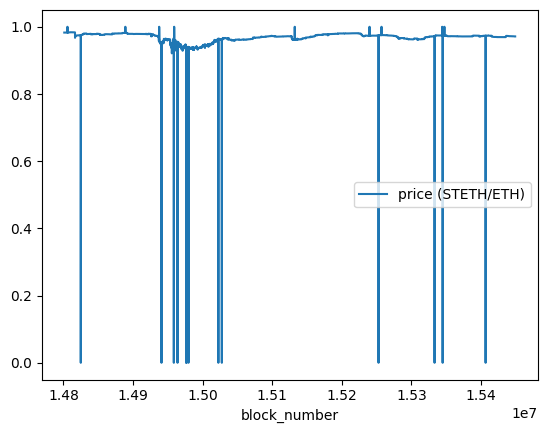

In [27]:
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

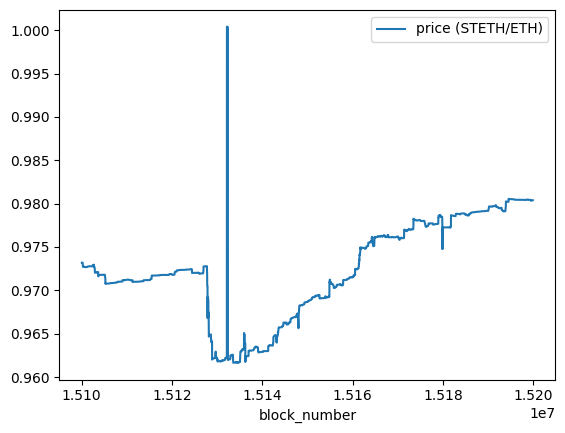

In [28]:
# well those are weird dips and spikes. look at smooth parts
query_swaps[(query_swaps['block_number'] > 15100000) & (query_swaps['block_number'] < 15200000)].plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

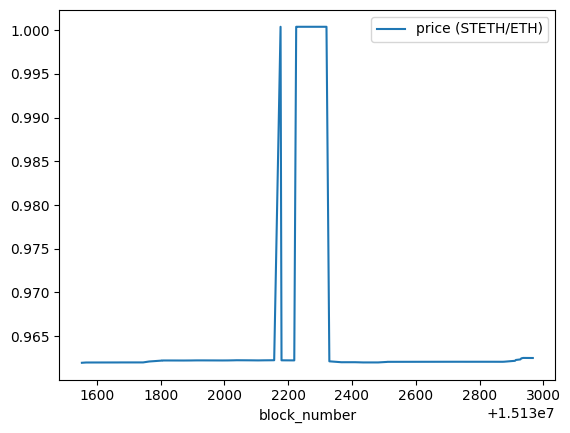

In [29]:
# weird spike for swaps back to 1.000 exchange rate. should look at this in event df
query_swaps[(query_swaps['block_number'] > 15131500) & (query_swaps['block_number'] < 15133000)].plot(x='block_number', y='price (STETH/ETH)')

In [30]:
# first, unfold event arguments into separate columns
def unfold_event_args(key: str, event_args: dict) -> tp.Any:
    return event_args[key]

for key in query_swaps.iloc[-1]['event_arguments'].keys():
    query_swaps[key] = query_swaps['event_arguments'].apply(lambda ev: unfold_event_args(key, ev))

In [31]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xe4f89ef89ea898ff00fab6104e6f1e710d960b841335...,14801106,0x754785094e509a0fb1ebe9939f8679089a5c5cb97a06...,7,0,0.983157,0x0000000000007F150Bd6f54c40A34d7C3d5e9f56,1,7684337914737397760,0,7551886490635847367
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xa87d2Fc358bE7B28772b8Eff9D2fd2628...,0xe510d6ae6e7e54135f01f7bb0e9cce3dde3147d9c4b0...,14801191,0x806aa145f02f9a162bb2ac2ecf4f599d16770ce30379...,351,220,0.983156,0xa87d2Fc358bE7B28772b8Eff9D2fd2628eCC70b3,1,3226174361931068386,0,3170563205299180827
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x0acbcf6e2b40974321c88cf51e59c2aecb35ce91264e...,14801276,0xacc314aca967358e6f705d4edcbfc31b002a59cef738...,33,6,0.983155,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,515000000000000000,0,506122536287773527
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x668fae3bfec1a77b524926e350d793f4320d2c534eac...,14801454,0x77f5e7f963411f63d19071dce4495bbe224ad8456d27...,271,141,0.983157,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,646739828624063883,0,635592669473662358
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x2A8F327085d733a3DBa191B3647818415...,0x9305a60aa3dbf456f306a9af6a7bab33534734a12042...,14801462,0xa8e6391e329e52c53eeddd64d3655a6627a0991e59f0...,13,3,0.983156,0x2A8F327085d733a3DBa191B3647818415A84Ff28,1,10067937771620446289,0,9894398395746061673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19509,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xf508346140a1e39dc1a2407ce00c5e32782e2e5e0b17...,15448952,0xbbc2c028f243711931094895914a5702afa7289207cc...,8,2,0.971647,0x0000000000007F150Bd6f54c40A34d7C3d5e9f56,0,1856522180000000000,1,1909931785534363755
19510,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xdcDaAC4c3826E7688a2eA2c7d5a3d34CB...,0xb9f43ea5b0e8f9e02445363e90f67aaadce5dfaaadff...,15448962,0x14b75802c403fb0440a52c3ec7c47f496b5de8397baa...,235,143,0.971646,0xdcDaAC4c3826E7688a2eA2c7d5a3d34CB790a08C,1,6700000000000000000,0,6507426340871131730
19511,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x2662D826A86D602c01aFFd6974432E430...,0x182d837872925b1c1bfc3cf817098a3cfa574188a086...,15448970,0x82c75ac4ef1f50219ad880a48c66c40c47affc014601...,123,73,0.971646,0x2662D826A86D602c01aFFd6974432E43009Eb14B,0,634166002394738250,1,652411187157682421
19512,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x605082e0794141C27f59F00f5C25dCde1...,0xb17a079ad541e32042d97bd9653bf226472a6373165a...,15449032,0x86edc078e1c579d5927f3aa3cd5d23474c85d8795949...,166,117,0.971646,0x605082e0794141C27f59F00f5C25dCde1Db8C122,0,750000000000000000,1,771577600310643103


In [32]:
# now, check swaps where price spikes up to 1 between blocks 15132100 and 15132400
query_swaps[(query_swaps['block_number'] > 15132100) & (query_swaps['block_number'] < 15132400)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
11451,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0xbaafb0dd80a49933313f5fae987331002fddd66ce398...,15132106,0x3f0dafa8c0bc1f75da4b77185df4b5e72f82367ce714...,6,1,0.962210,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,9999999999999999,0,9618254969587698
11452,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x38ecea57eecc869cc4a62d96555f15ffe3136f32e06d...,15132124,0x97431fe5b1b89ff7dd6dd8c340ca44707052bbdf729f...,291,123,0.962220,0xfA9a30350048B2BF66865ee20363067c66f67e58,0,33697027127765331114,1,35006090866436268938
11453,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0031130c56162e00A7e9C01eE4147b11c...,0xed21e5dc1f4099e247b0e815eb3874a7ff1d837d3a8e...,15132156,0x369ef5481d51a5d35c3e5fa176283314cdd284d829eb...,73,46,0.962230,0x0031130c56162e00A7e9C01eE4147b11cbac8776,0,2461328000000000000,1,2556919375120216623
11454,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x7438e5f555766a7f549d93c98022e0c6484729fa8d9f...,15132176,0x7905d8a7692da709cb1f9deaed58d35b3e29fa956fae...,34,10,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11455,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x722c4b153c4e33f1f5cbd0819d4847851d588d08184a...,15132179,0x8ec15d94c325e9e9552dc7f2c48e20f982ff5e694b3f...,40,24,0.962221,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,35006090866436268938,0,33670122355004768780
11456,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x93Fa84f3102d45fC8e0721143c05b2c15...,0x510b3876226e4bc81ae5afeedc3754dffcd5842bbe1d...,15132219,0x57d3a5987fce344172cc3549db379419aff5745c1ccc...,323,144,0.962212,0x93Fa84f3102d45fC8e0721143c05b2c156026025,0,1300000000000000000,1,1350513053366563254
11457,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x56804547a6d74ac0152564a250aff84cea33b85ed53f...,15132225,0xc766211f83c2421824f805fd98f43bca867a03c63947...,62,8,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11458,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x3356a73accd1729384e364750411036472c2b9ff5327...,15132229,0x368ab30333621f418f1f6634d737d72adb2f77421518...,58,12,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11459,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0xd6978029b6bb52e8b4ffae55ce8f5a2de8b652ef0a1f...,15132280,0xd3893a3097aadadfa9fea3fadad6f7bdd48c54c03f80...,6,1,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1
11460,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x6A0Af71516690d9e85c579a3a18C76ac8...,0x93751a459ccb0838f4cfe07960e6afff4eeaf33facbe...,15132283,0x74c38343de39bd403e4c49b068e389068b21be043ef0...,6,1,1.000400,0x6A0Af71516690d9e85c579a3a18C76ac8E33efD1,1,1,0,1


In [ ]:
# ahh, ok :) .. someones selling 1 wei into the pool (see e.g. block 15132225)
# which is causing rounding issues for price calc

<AxesSubplot:xlabel='block_number'>

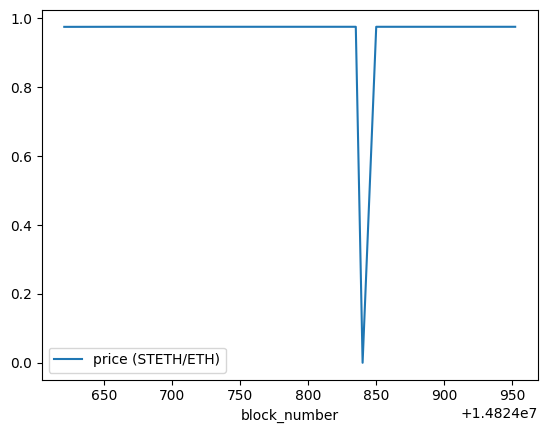

In [33]:
# are the dusting rounding issues also causing those spikes down to zero?
# look at first spike down to 0
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)].plot(x='block_number', y='price (STETH/ETH)')

In [34]:
# looks like it (see swap at block 14824840); similar rounding issues except rounded down to zero here
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
528,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x08CC4a936A24A278097FeB566Fccf71FF...,0xbefdc34be9f6d50dcf7d9692c834f2fcb750a7880a30...,14824621,0x10cf6cb3feb597dcaefdfa6fab3730491fea055a51b4...,236,204,0.975627,0x08CC4a936A24A278097FeB566Fccf71FFe84A833,0,2000000000000000000000,1,2049143953945768280377
529,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xe7a98e6b9dbdab7e4e169efbb8ba055a9f0a28da8587...,14824663,0xc07d6c8038fd4165fd07386037f0a63b56701b00e1d7...,66,60,0.975835,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,0,9669640333791112375,1,9905129894611176792
530,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xebbe2cac6a8cea633f4ce13aecc6b3d402f0a53de0df...,14824714,0x090d8bfa4b34ab2e8670c488fdde86fa8c5caef4cbd4...,115,81,0.975836,0x27239549DD40E1D60F5B80B0C4196923745B1FD2,1,4393970000000000000,0,4286080251138498473
531,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x6a1a41032f086a90520761d6444937ff73b3aea580c2...,14824787,0x2749b488383fe28bb2abeab7d111d8472e406c445803...,150,92,0.975836,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,1000730293446869257,0,976157742840268152
532,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0xf97ecc3423d91b6f51e0f384518237b4c5439490f21f...,14824795,0x9038606c713de55bd5e65ed931117811e79820115ee7...,139,77,0.975836,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,0,476594175496263493,1,488200580530122222
533,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0xd3c3131024e6f4fb640f27a7a07513c44a4247ea663c...,14824820,0x0c7676c94dcc0bd3a33e55f1ae8bce51c723e1251f5d...,43,49,0.975835,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,10000000000000000000,0,9754443750619738380
534,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xEda584Ac4234113e977Bd172e6393F579...,0x953204aa910f21a8012789670728e410039a8f9840b6...,14824835,0xfdf144489b7e75244e22839ce1c8a398f7745a57a1c0...,397,246,0.975829,0xEda584Ac4234113e977Bd172e6393F579282b816,1,47870179539630044007,0,46694419191845003347
535,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xEda584Ac4234113e977Bd172e6393F579...,0xb2c64c3e9722df4fbcd79662cd6746e069ae08f55242...,14824840,0xfc556897c82ced07979693ce76cd27b4565e78cb0959...,462,195,0.000000,0xEda584Ac4234113e977Bd172e6393F579282b816,1,1,0,0
536,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xc5de9e64196dff8dd176eece734d88b68e9f4e41cd1d...,14824850,0x1bc4068a1b8284a00ea135dc590d18744bf548a1c795...,84,43,0.975824,0x27239549DD40E1D60F5B80B0C4196923745B1FD2,0,1000000000000000000,1,1024364849804104284
537,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x11CE580B7D64Fb08F73161AA95835202a...,0xe0c2a35ae160788e8d1d73a5bf465279363581af043f...,14824871,0x0f6bf5cc06980ac2ef46f0a73831494c426c0c9b3336...,394,188,0.975824,0x11CE580B7D64Fb08F73161AA95835202ae1C9417,1,381485996253488127,0,372114382696495947


In [35]:
# apply min size to swaps we care about to ignore the dustings
min_bought = 0.0001 * 1e18  # trade size must be > 0.0001 ETH 
query_swaps = query_swaps[query_swaps['tokens_bought'] > min_bought]

<AxesSubplot:xlabel='block_number'>

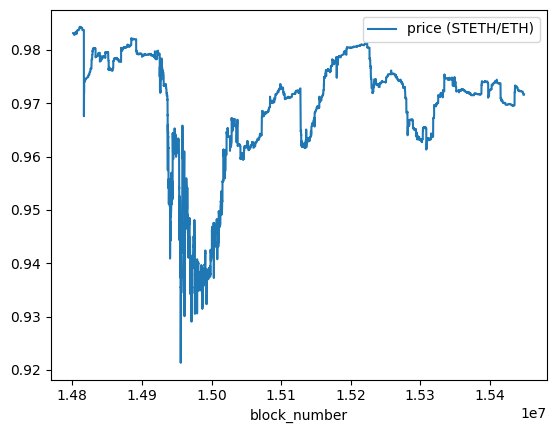

In [36]:
# nice! way better
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

In [ ]:
# should smooth the price data out so not so jittery by averaging over 1h for hourly candles.
# keep the volumes numbers as well, so make some slight changes to the (tokens_bought, tokens_sold)
# columns to instead track (volume_coin0, volume_coin1) at each swap

In [37]:
# write a function that returns volume on coin indices for a swap
def get_volume(coin_index: int, x: pd.Series) -> (int, int):
    volume = x['tokens_sold'] if x['sold_id'] == coin_index else x['tokens_bought']
    return volume

In [38]:
%%capture
for coin_index in range(2):
    key = f'volume_coin{coin_index}'
    query_swaps[key] = query_swaps.apply(lambda x: get_volume(coin_index, x), axis=1)

In [39]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought,volume_coin0,volume_coin1
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xe4f89ef89ea898ff00fab6104e6f1e710d960b841335...,14801106,0x754785094e509a0fb1ebe9939f8679089a5c5cb97a06...,7,0,0.983157,0x0000000000007F150Bd6f54c40A34d7C3d5e9f56,1,7684337914737397760,0,7551886490635847367,7551886490635847367,7684337914737397760
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xa87d2Fc358bE7B28772b8Eff9D2fd2628...,0xe510d6ae6e7e54135f01f7bb0e9cce3dde3147d9c4b0...,14801191,0x806aa145f02f9a162bb2ac2ecf4f599d16770ce30379...,351,220,0.983156,0xa87d2Fc358bE7B28772b8Eff9D2fd2628eCC70b3,1,3226174361931068386,0,3170563205299180827,3170563205299180827,3226174361931068386
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x0acbcf6e2b40974321c88cf51e59c2aecb35ce91264e...,14801276,0xacc314aca967358e6f705d4edcbfc31b002a59cef738...,33,6,0.983155,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,515000000000000000,0,506122536287773527,506122536287773527,515000000000000000
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x668fae3bfec1a77b524926e350d793f4320d2c534eac...,14801454,0x77f5e7f963411f63d19071dce4495bbe224ad8456d27...,271,141,0.983157,0x220bdA5c8994804Ac96ebe4DF184d25e5c2196D4,1,646739828624063883,0,635592669473662358,635592669473662358,646739828624063883
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x2A8F327085d733a3DBa191B3647818415...,0x9305a60aa3dbf456f306a9af6a7bab33534734a12042...,14801462,0xa8e6391e329e52c53eeddd64d3655a6627a0991e59f0...,13,3,0.983156,0x2A8F327085d733a3DBa191B3647818415A84Ff28,1,10067937771620446289,0,9894398395746061673,9894398395746061673,10067937771620446289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19509,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xf508346140a1e39dc1a2407ce00c5e32782e2e5e0b17...,15448952,0xbbc2c028f243711931094895914a5702afa7289207cc...,8,2,0.971647,0x0000000000007F150Bd6f54c40A34d7C3d5e9f56,0,1856522180000000000,1,1909931785534363755,1856522180000000000,1909931785534363755
19510,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xdcDaAC4c3826E7688a2eA2c7d5a3d34CB...,0xb9f43ea5b0e8f9e02445363e90f67aaadce5dfaaadff...,15448962,0x14b75802c403fb0440a52c3ec7c47f496b5de8397baa...,235,143,0.971646,0xdcDaAC4c3826E7688a2eA2c7d5a3d34CB790a08C,1,6700000000000000000,0,6507426340871131730,6507426340871131730,6700000000000000000
19511,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x2662D826A86D602c01aFFd6974432E430...,0x182d837872925b1c1bfc3cf817098a3cfa574188a086...,15448970,0x82c75ac4ef1f50219ad880a48c66c40c47affc014601...,123,73,0.971646,0x2662D826A86D602c01aFFd6974432E43009Eb14B,0,634166002394738250,1,652411187157682421,634166002394738250,652411187157682421
19512,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x605082e0794141C27f59F00f5C25dCde1...,0xb17a079ad541e32042d97bd9653bf226472a6373165a...,15449032,0x86edc078e1c579d5927f3aa3cd5d23474c85d8795949...,166,117,0.971646,0x605082e0794141C27f59F00f5C25dCde1Db8C122,0,750000000000000000,1,771577600310643103,750000000000000000,771577600310643103


In [40]:
# prep for smoothing by setting index to block number (choose last swap in block to represent price at block)
query_swaps_filtered = query_swaps.filter(['block_number', 'price (STETH/ETH)', 'volume_coin0', 'volume_coin1']).drop_duplicates('block_number', keep='last')
query_swaps_filtered = query_swaps_filtered.set_index('block_number')

In [41]:
# reindex by block number (1 block steps) and ffill price values 
new_index = range(query_swaps_filtered.index.min(), query_swaps_filtered.index.max()+1)
query_swaps_filtered = query_swaps_filtered.reindex(new_index).ffill()

In [42]:
# smooth data using mean over 260 blocks for ~ 1h candles
window = 260
s = (query_swaps_filtered.index.to_series() / window).astype(int)
query_swaps_candled = query_swaps_filtered.groupby(s).agg({'price (STETH/ETH)': 'mean', 'volume_coin0': 'sum', 'volume_coin1': 'sum'}).set_index(s.index[::window])

In [43]:
# normalize coin volumes wrt 1e18 decimals
query_swaps_candled['volume_coin0'] = query_swaps_candled['volume_coin0'] / 1e18
query_swaps_candled['volume_coin1'] = query_swaps_candled['volume_coin1'] / 1e18

In [44]:
query_swaps_candled

,price (STETH/ETH),volume_coin0,volume_coin1
block_number,,,
14801106,0.983156,913.432714,929.453544
14801366,0.983156,1237.568547,1258.54412
14801626,0.983160,9261.289651,9423.221433
14801886,0.983141,2466.305049,2509.38183
14802146,0.983137,23816.288597,24234.152119
...,...,...,...
15447986,0.971697,9379.514589,9657.349108
15448246,0.971588,6312.045635,6493.945398
15448506,0.971625,9933.494,10219.77814


<AxesSubplot:xlabel='block_number'>

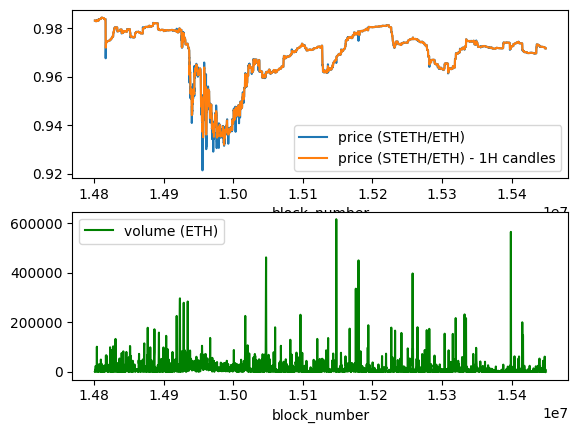

In [45]:
# make some fancy plots w subplots ...
fig, ax = plt.subplots(2, 1)
query_swaps.plot(x='block_number', y='price (STETH/ETH)', ax=ax[0])
query_swaps_candled.plot(y='price (STETH/ETH)', ax=ax[0], label='price (STETH/ETH) - 1H candles')
query_swaps_candled.plot(y='volume_coin0', color='g', ax=ax[1], label='volume (ETH)')

In [46]:
# TODO: volume chart seems off since would expect largest volume around drop down to 0.92. investigate/fix!
# TODO: also, instead of just mean, should do ohlc since that'd be dope to plot :o